In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4


1 spectrum  in use
 
Spectral Data File: P0886060901PNS003SRSPEC0004.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.680e-03 +/- 6.588e-04 (71.0 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-7
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.862e+04 sec
 Using fit statistic: chi
 Using Background File                P0886060901PNS003BGSPEC0004.FTZ
  Background Exposure Time: 1.862e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY2.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0886060901PNS003SRCARF0004.FTZ



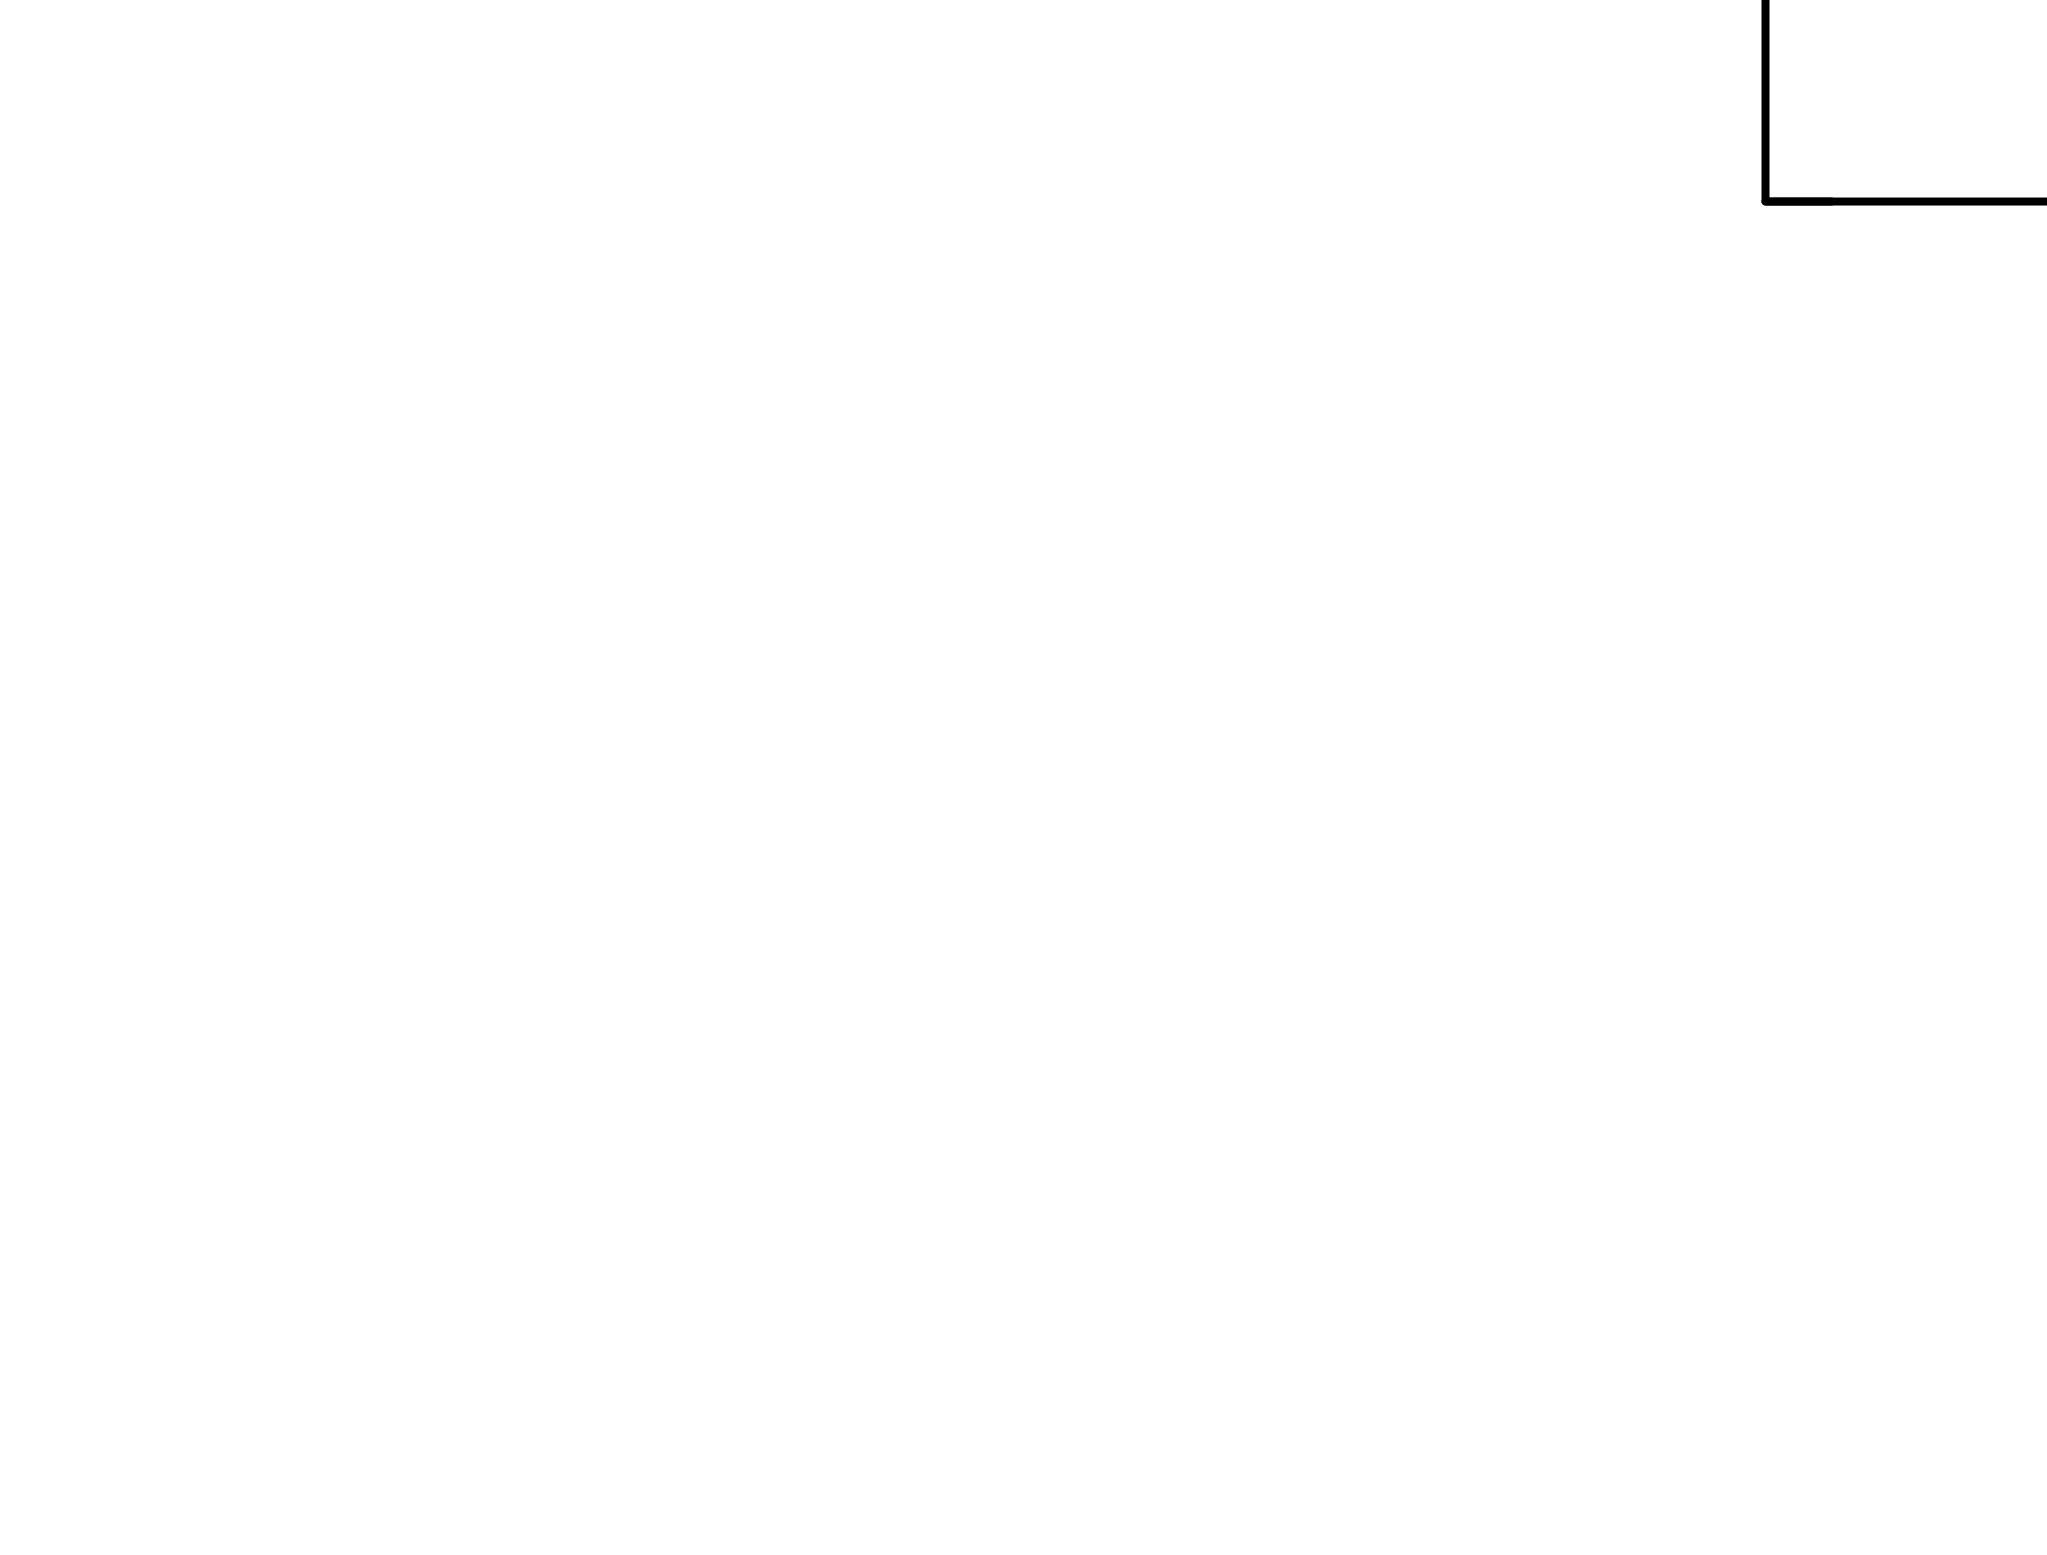

In [2]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")

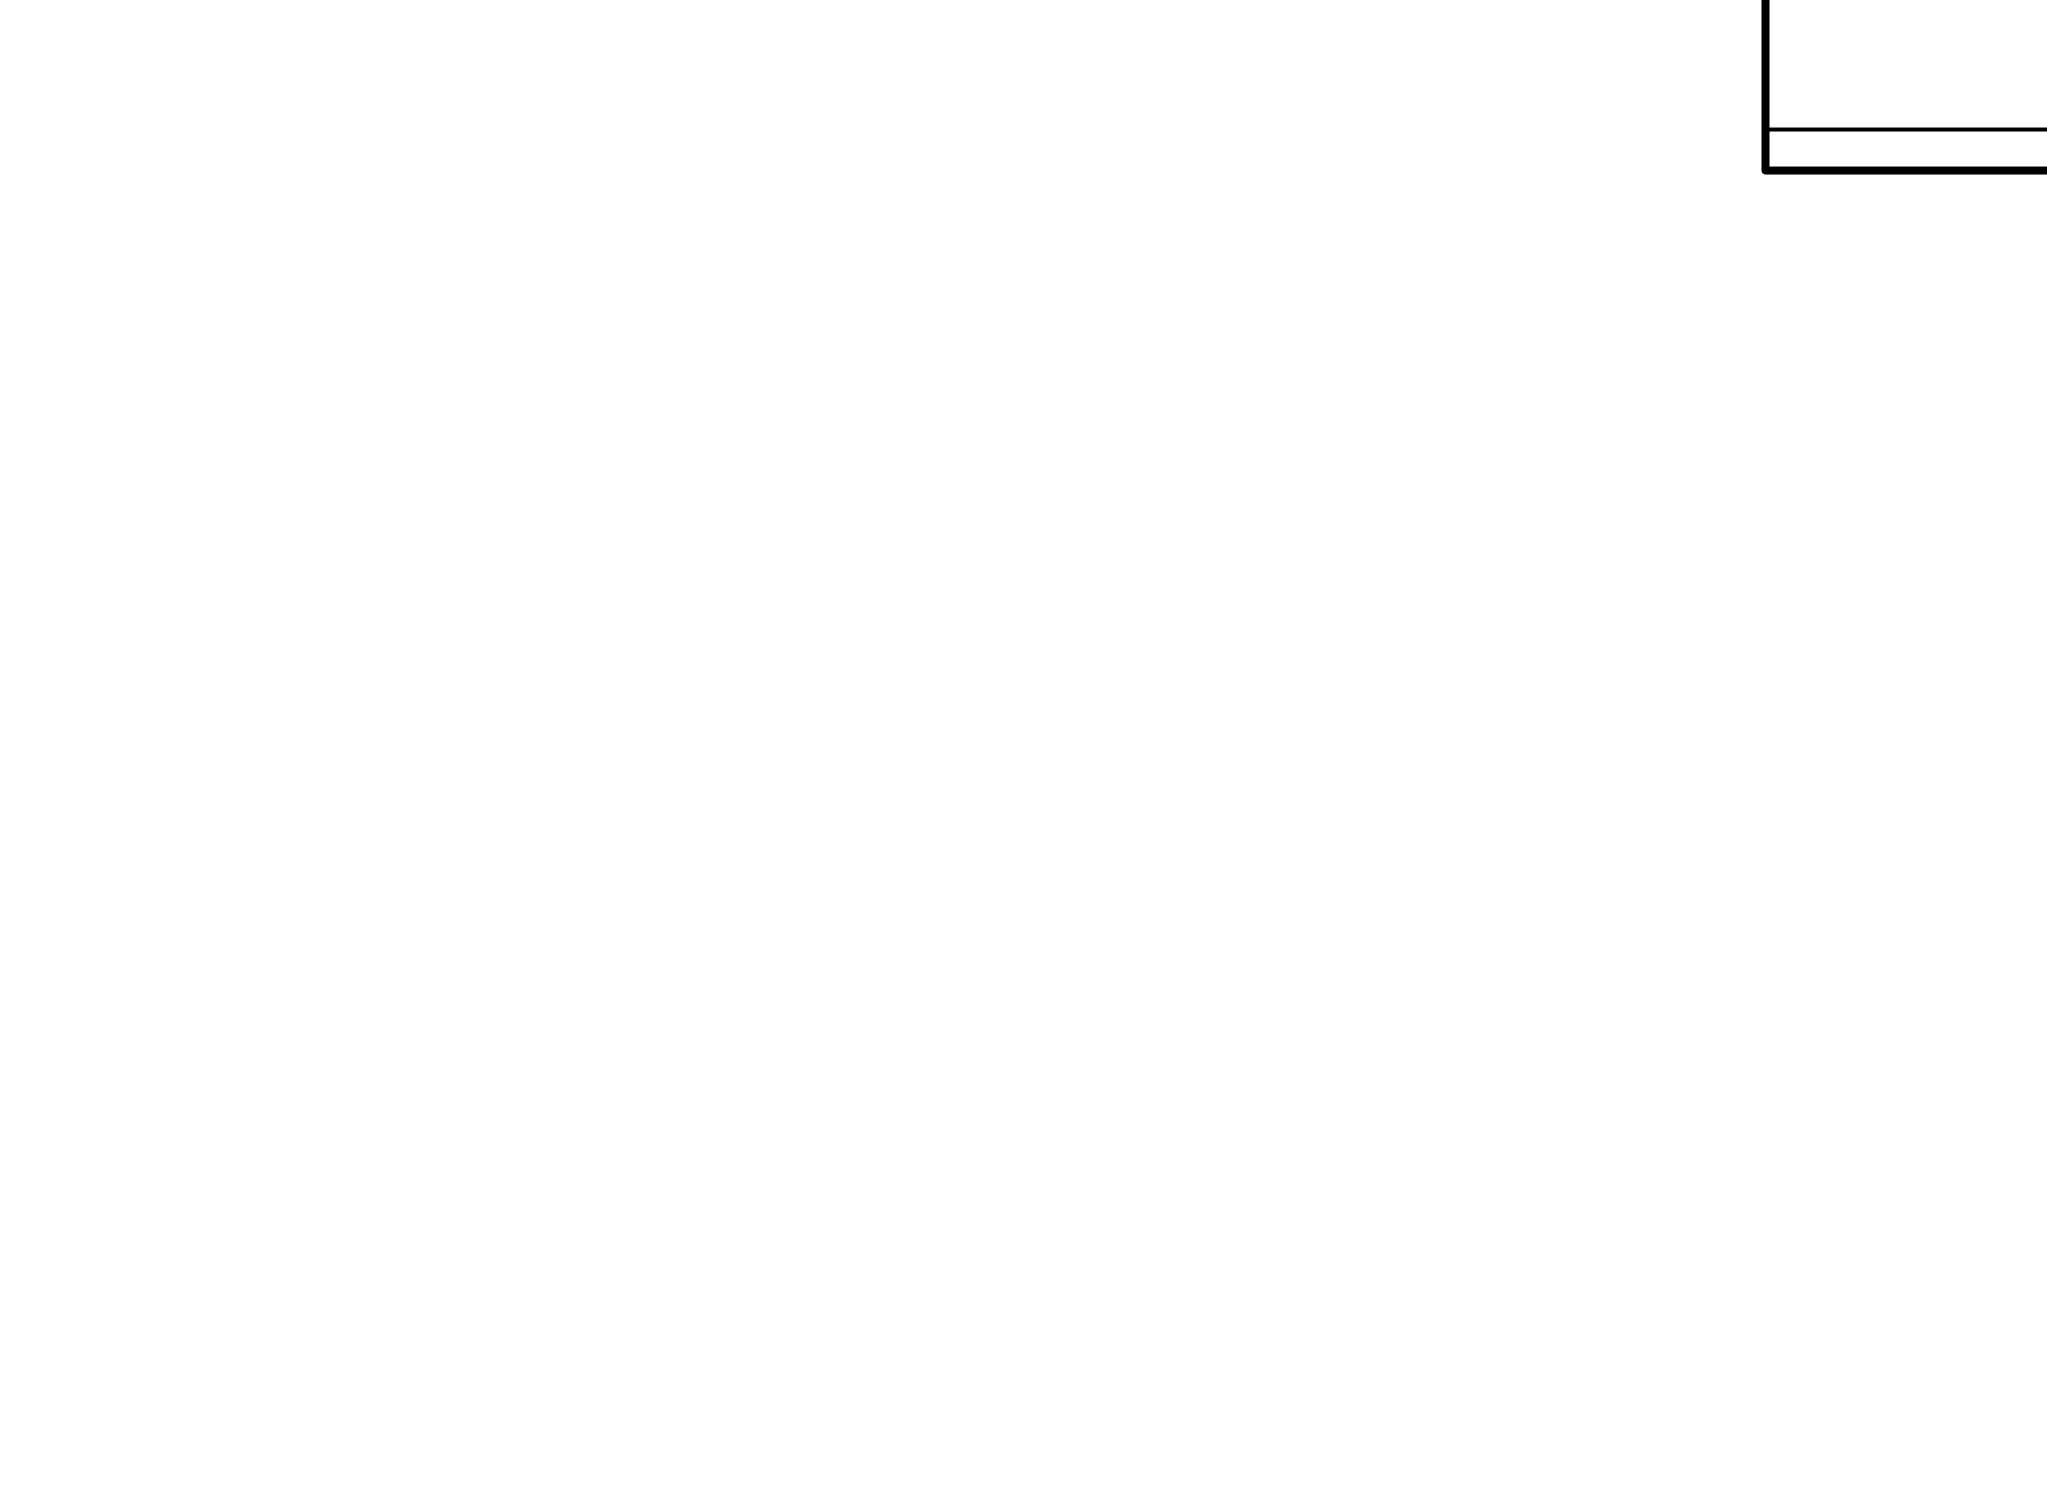

      No channels ignored (no channels in specified range)
     1 channels (7) ignored in spectrum #     1


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner 

In [3]:
spec.ignore("**-0.2 12.0-**")
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              5.394045e+11     using 6 bins.

Test statistic : Chi-Squared              5.394045e+11     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
49.7715      2.40975      -1      0.162140       1.66720   3.56859e-06
45.9431      1.38429e+06  -2      0.609765       5.16209   1.85078e-05
12.8303      293481        0      0.503717       4.25258   3.43582e-05
9

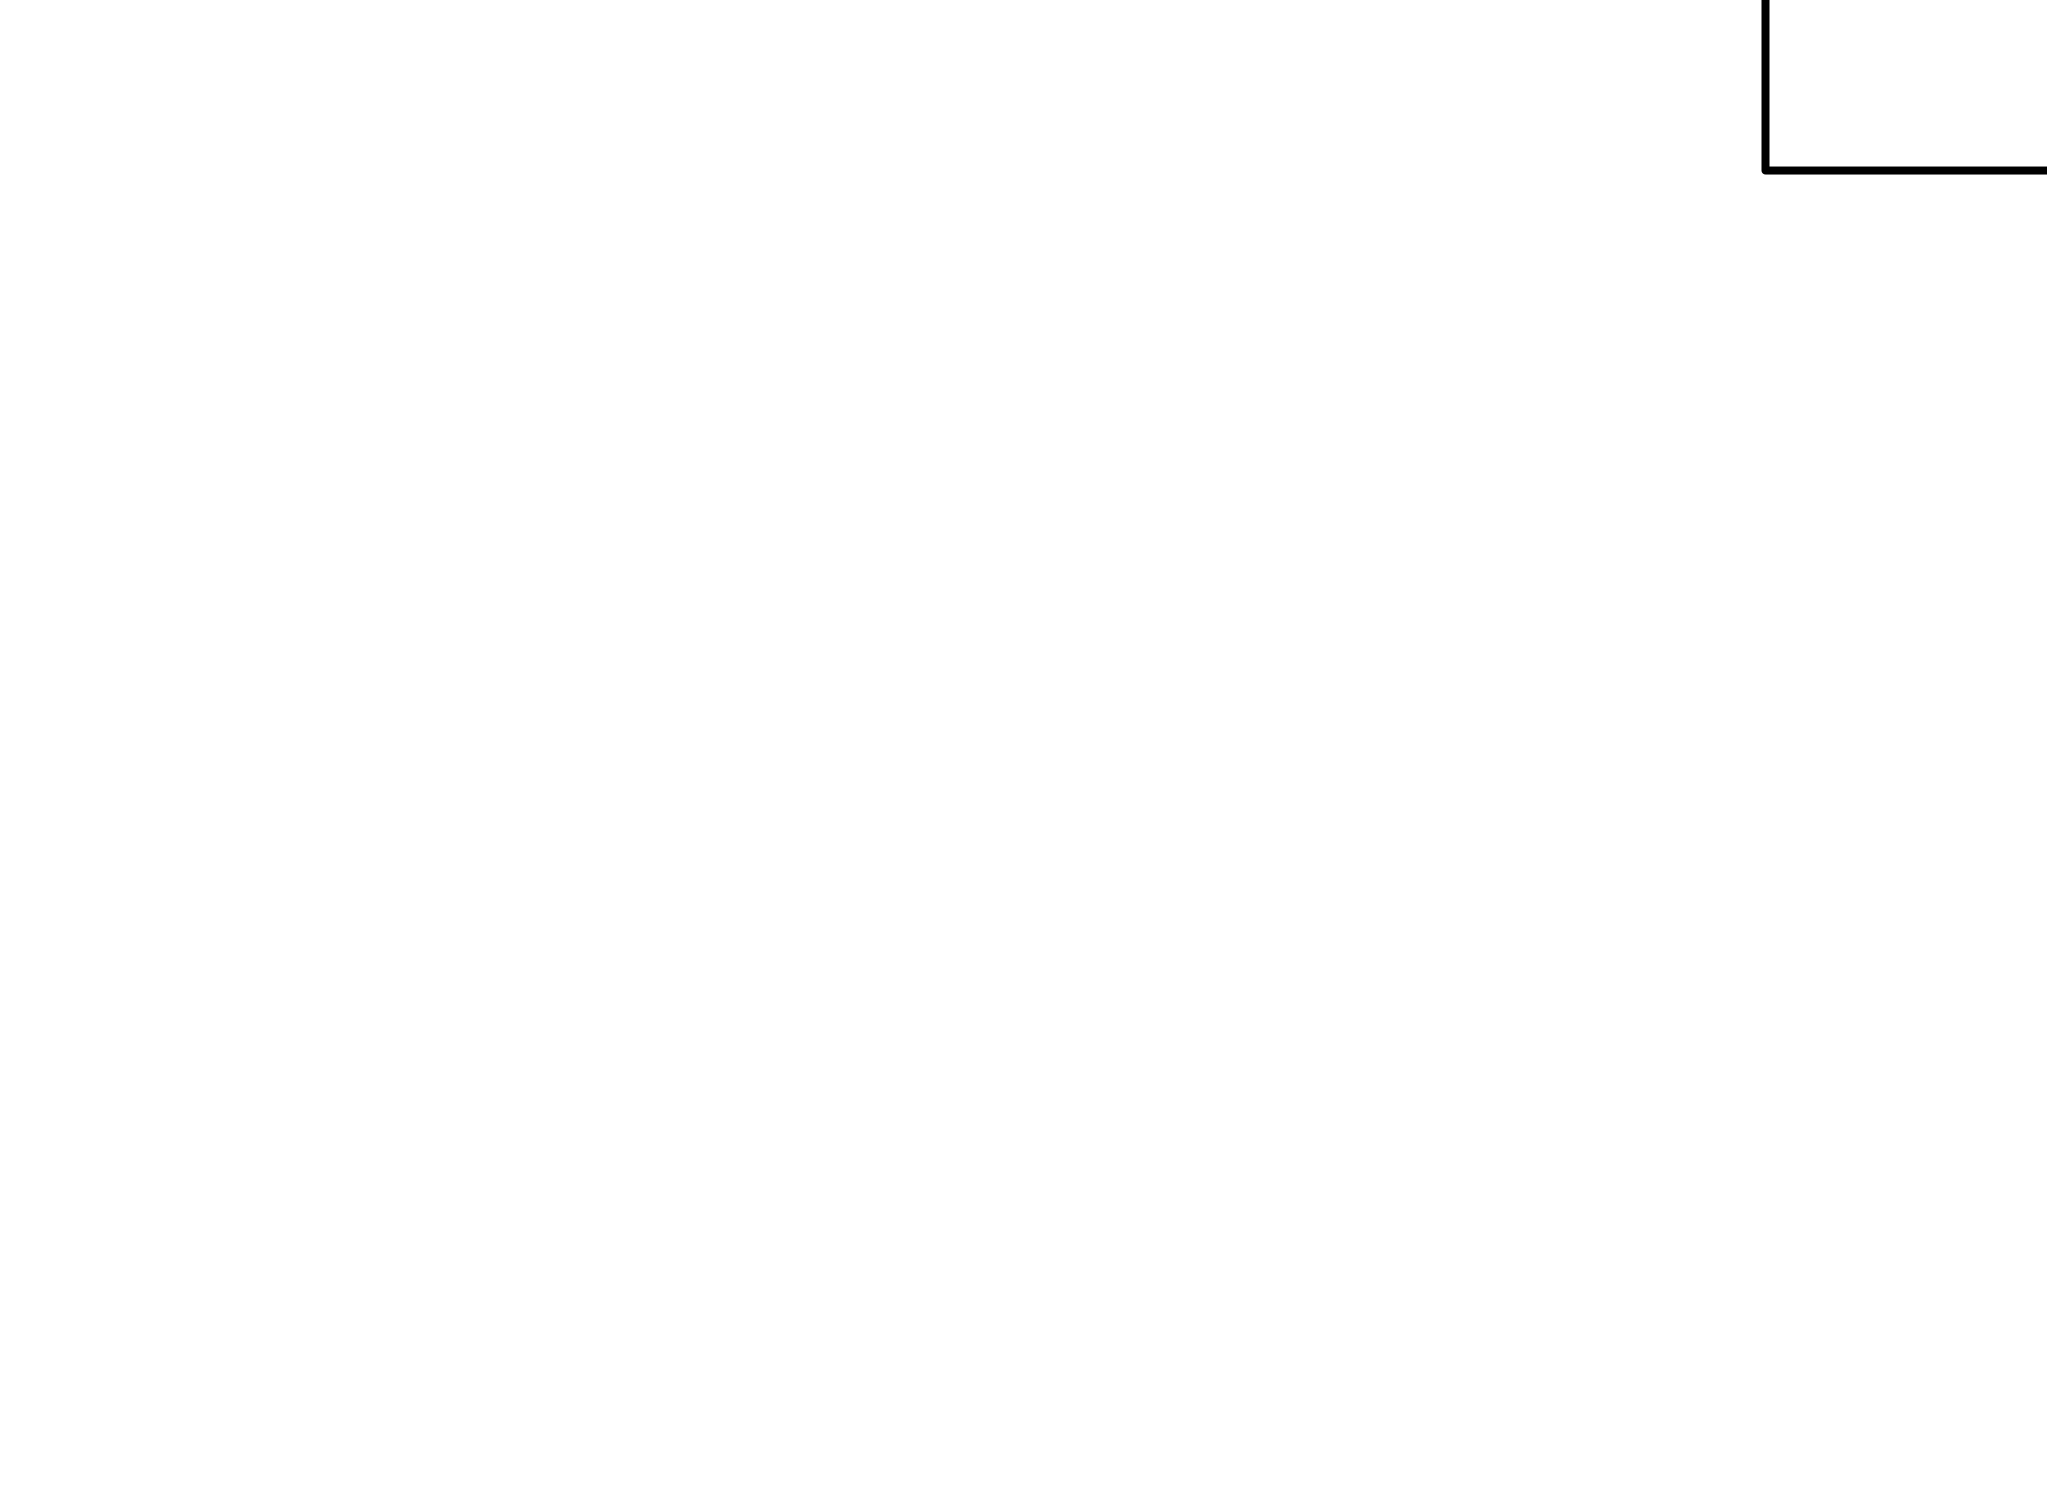

In [4]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.157972e+11     using 6 bins.

Test statistic : Chi-Squared              1.157972e+11     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
54.7934      2.8375       -1      0.496176       2.97202   8.41446e-06
46.2159      460069       -1      0.229897       2.09662   7.36403e-06
21.6363      722977       -1     0.0685142       1.59488   1.68742e-05
18.

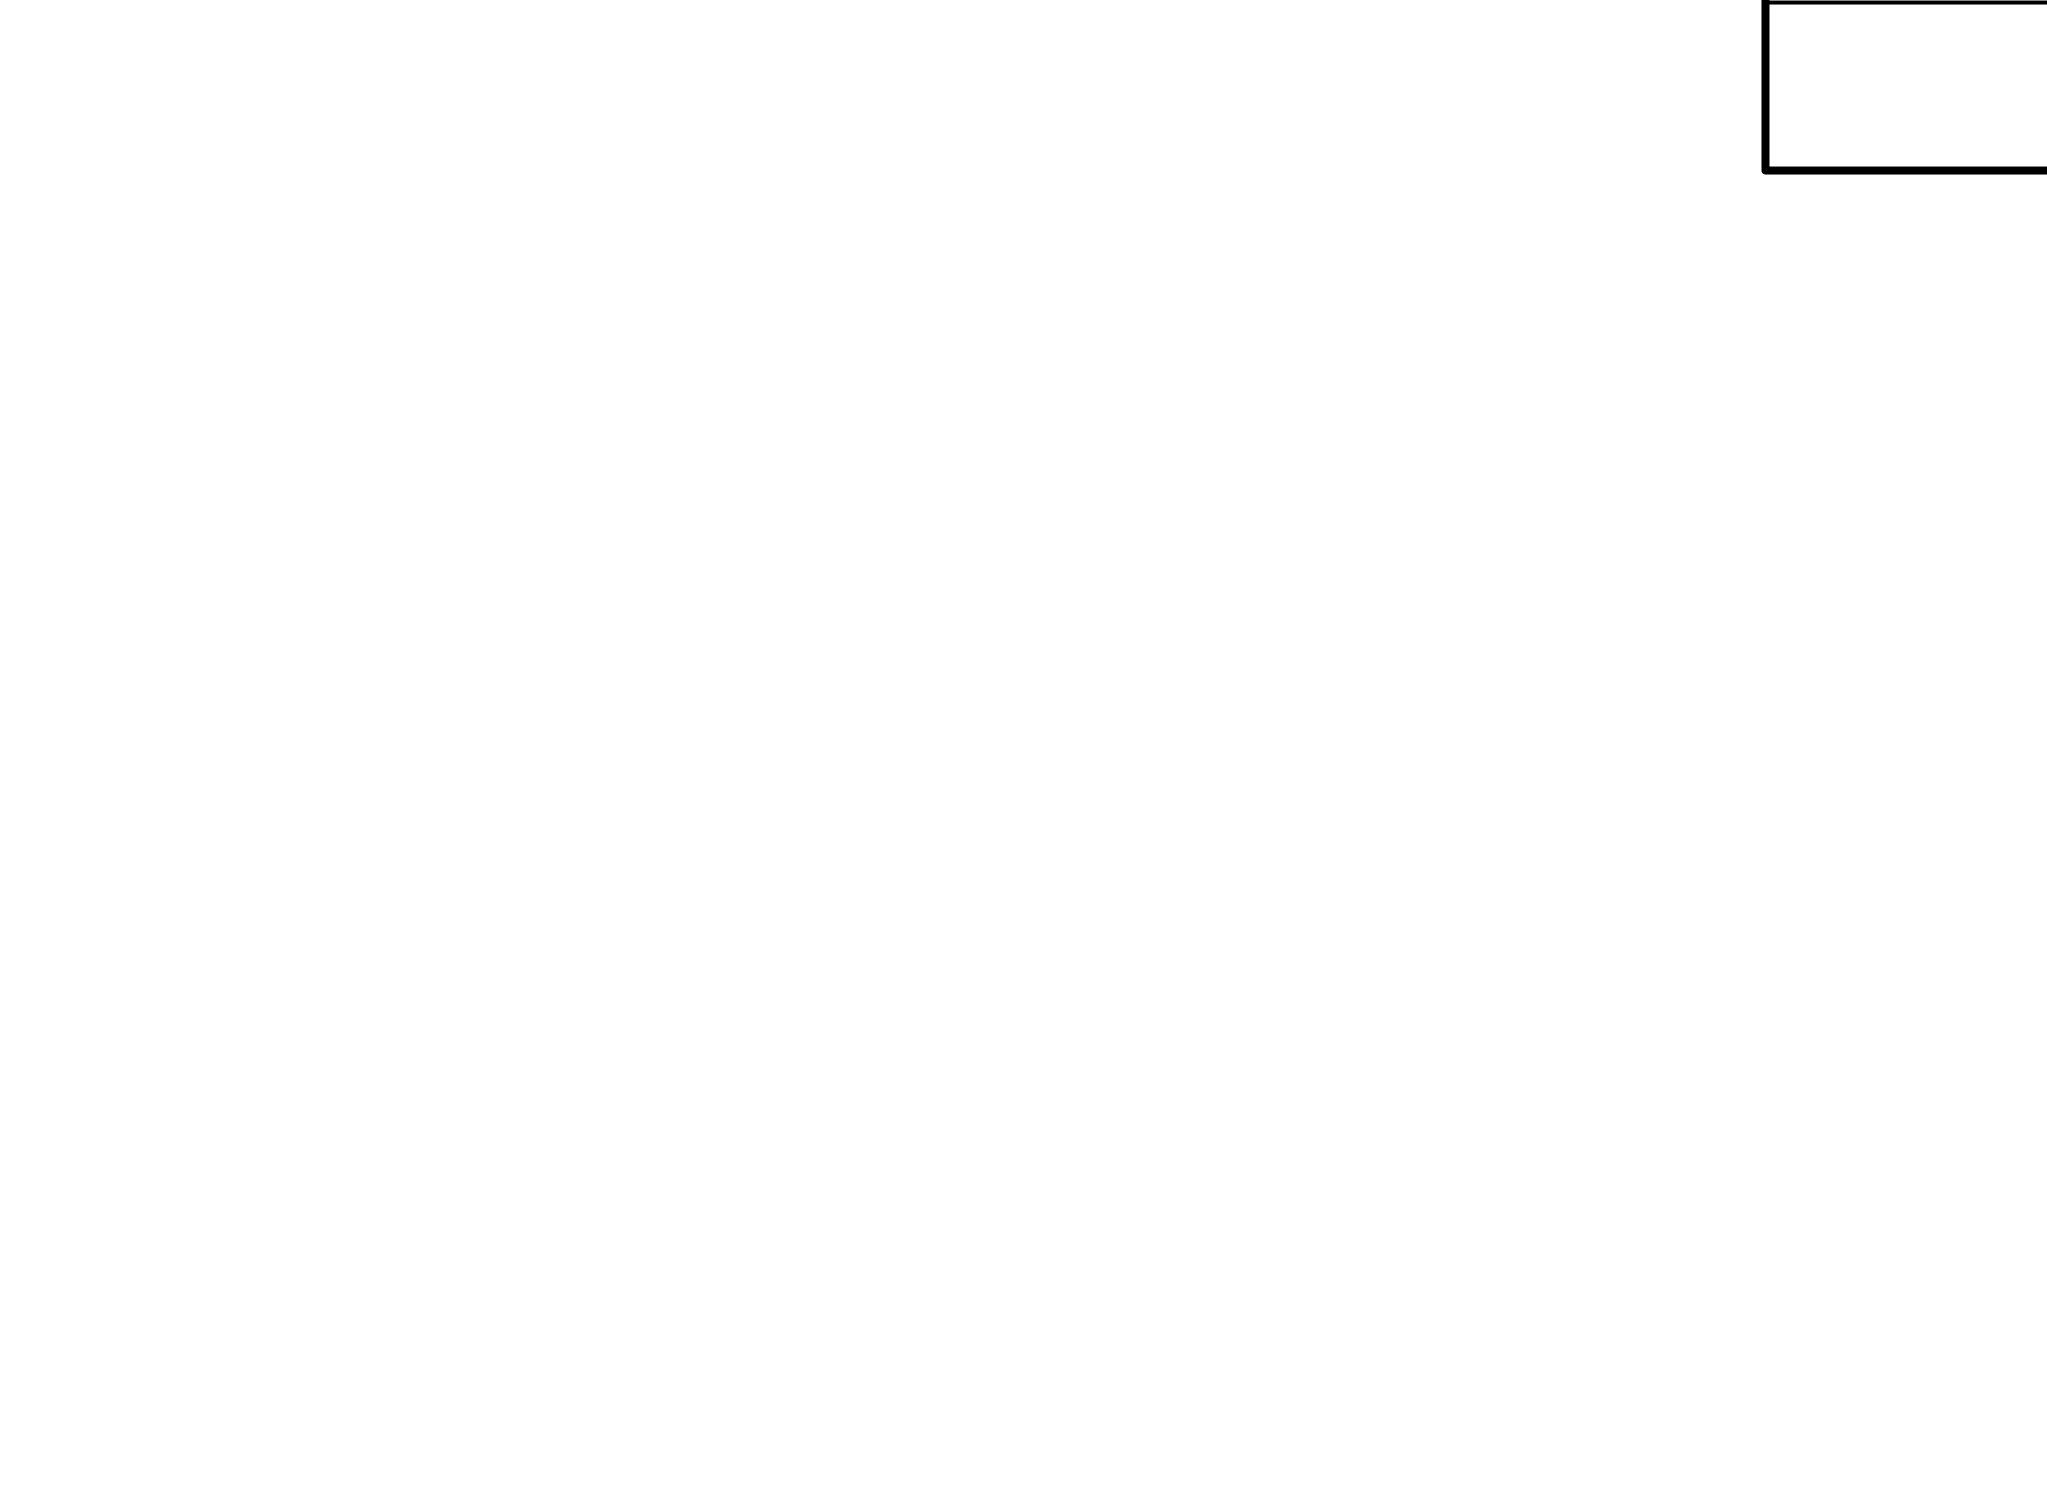

In [5]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.697278e+10     using 6 bins.

Test statistic : Chi-Squared              1.697278e+10     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
16.5929      8.40579       0      0.959402      0.764456   6.1

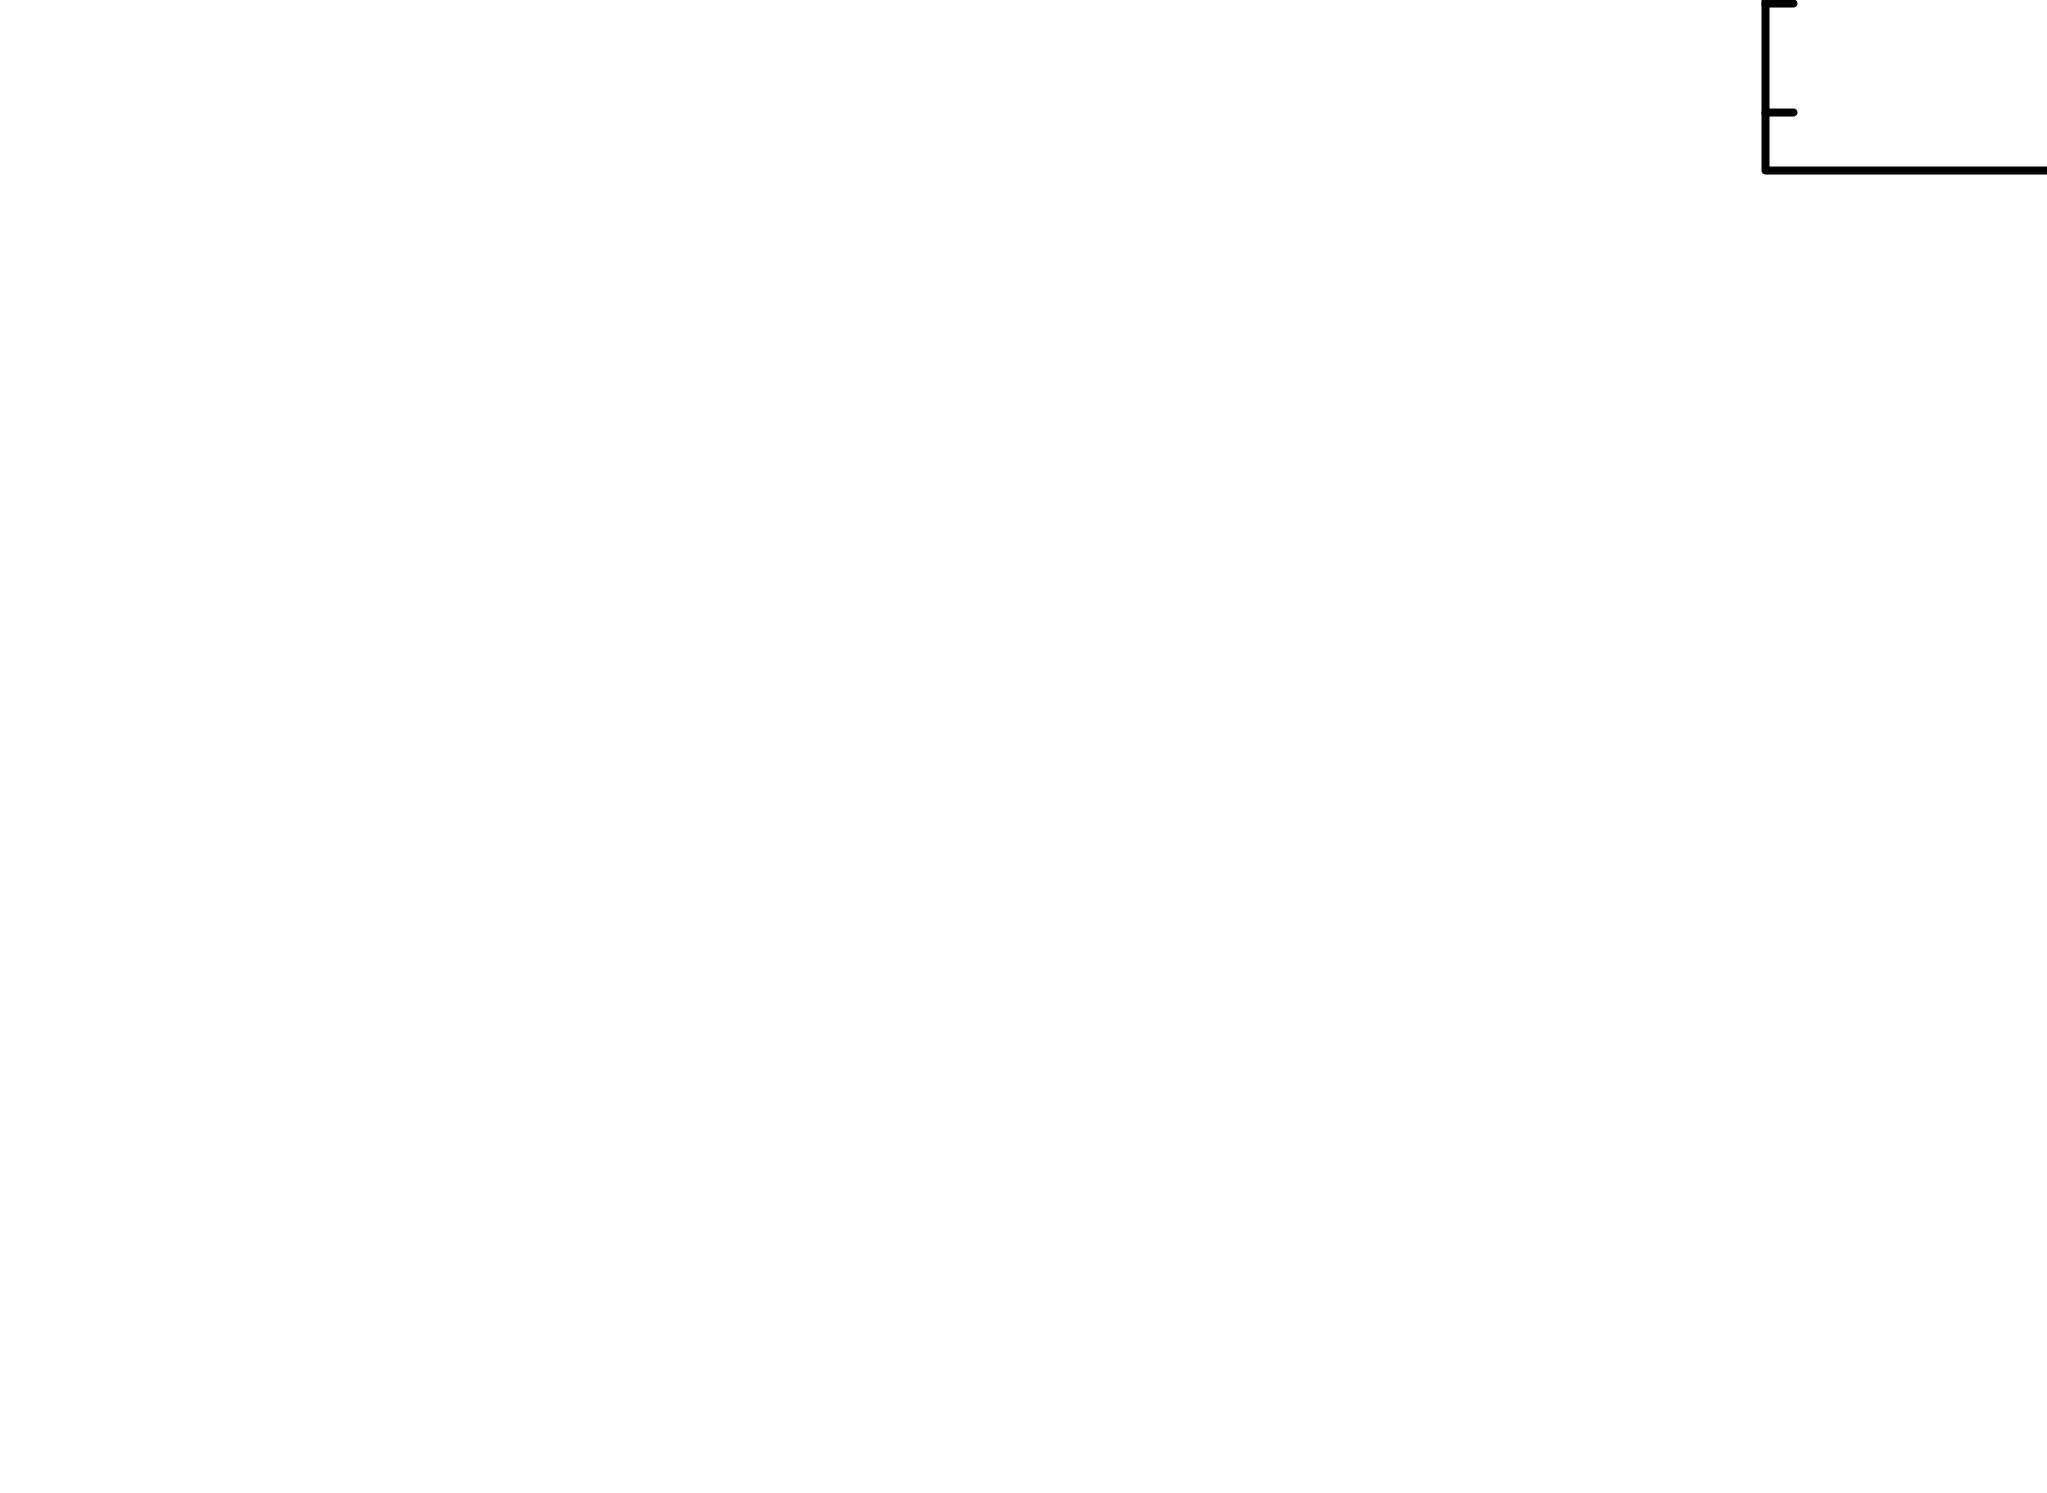

In [6]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [7]:
AllModels.calcFlux(".2 12.0")

 Model Flux 1.3085e-05 photons (2.3996e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [8]:
plx = 1.1483
d_kpc = 1/plx
F_x = 2.3996*10**-14

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

2.1767552795047748e+30


In [9]:
F_opt = 1.05*10**-5 * 10**(-0.4*15.94)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', F_x/F_opt)

Optical Flux:  4.41762959803666e-12
F_x / F_opt:  0.005431872335033387
